# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization

2025-01-13 15:10:59.299574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 15:10:59.429063: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 15:10:59.557880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 15:10:59.664626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 15:10:59.695667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 15:10:59.900544: I tensorflow/core/platform/cpu_feature_gu

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

- 1, es clasificación binaria.
- Depende.
    - En clasificación binaria se suele usar la fución de activación sigmoide.
    - En clasificación muticlase se suele usar la función de activación softmax.
    - En regrsión no se suele usar ninguna función de activación en específica.
- 10 neuronas de salida (una por numero escrito a mano 0-9) con función softmax. 
- Ninguna, no queremos que la neurona transforme el valor de salida.

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de las imágenes (opcional pero recomendado)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# División del conjunto de entrenamiento en train y validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=17)

# Imprimir tamaños de los conjuntos
print(f"Conjunto de entrenamiento: {x_train.shape}")
print(f"Conjunto de validación: {x_val.shape}")
print(f"Conjunto de prueba: {x_test.shape}")


Conjunto de entrenamiento: (48000, 28, 28)
Conjunto de validación: (12000, 28, 28)
Conjunto de prueba: (10000, 28, 28)


In [3]:
learning_rates=[7e-4,1e-3,5e-3]
models=[]
histories=[]

In [4]:
tf.keras.backend.clear_session()

tf.random.set_seed(17)
i=0
for lr in learning_rates:
    
    model = Sequential(
        [
            Input(shape=(28, 28)),
            Flatten(),
            Dense(126, activation="relu"),
            Dense(42, activation="relu"),
            Dense(10, activation="softmax"),
        ]
)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
    
    

    models.append(model)


In [5]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [6]:
for model in models:
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    histories.append(model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),callbacks=early_stopping_cb))


Learning rate: 0.0007
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8414 - loss: 0.5497 - val_accuracy: 0.9540 - val_loss: 0.1667
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9560 - loss: 0.1499 - val_accuracy: 0.9663 - val_loss: 0.1245
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.1006 - val_accuracy: 0.9688 - val_loss: 0.1128
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0741 - val_accuracy: 0.9706 - val_loss: 0.1084
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9699 - val_loss: 0.1082
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0422 - val_accuracy: 0.9721 - val_loss: 0.1085
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0319 - val_accuracy: 0.9713 - val_loss: 0.1147
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.

In [7]:
for idx, history in enumerate(histories, start=1):
    print(f"\nResultados finales del modelo {idx}:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    
    # Obtener la última epoch registrada
    final_epoch = len(history.history['loss'])
    
    # Imprimir la última pérdida y precisión
    print(f"Última pérdida: {history.history['loss'][-1]}")
    print(f"Última precisión en entrenamiento: {history.history['accuracy'][-1]}")
    print(f"Última pérdida en validación: {history.history['val_loss'][-1]}")
    print(f"Última precisión en validación: {history.history['val_accuracy'][-1]}")


Resultados finales del modelo 1:
Learning rate: 0.0007
Última pérdida: 0.010108732618391514
Última precisión en entrenamiento: 0.9964791536331177
Última pérdida en validación: 0.13688507676124573
Última precisión en validación: 0.9755833148956299

Resultados finales del modelo 2:
Learning rate: 0.001
Última pérdida: 0.017791710793972015
Última precisión en entrenamiento: 0.9936875104904175
Última pérdida en validación: 0.13978688418865204
Última precisión en validación: 0.971833348274231

Resultados finales del modelo 3:
Learning rate: 0.005
Última pérdida: 0.056884847581386566
Última precisión en entrenamiento: 0.9838333129882812
Última pérdida en validación: 0.18265902996063232
Última precisión en validación: 0.9677500128746033


In [12]:
modelos=[]
for idx,model in enumerate(models, start=0):
    path=f"resultados4_3/my_keras_model_{idx}.keras"
    print(path)
    model.save(path)
    modelos.append(tf.keras.models.load_model(path))
    

resultados4_3/my_keras_model_0.keras
resultados4_3/my_keras_model_1.keras
resultados4_3/my_keras_model_2.keras


In [13]:
mejor_precision = 0
mejor_modelo = None
mejor_resultado = None

for modelo in modelos:
    test_loss, test_accuracy = modelo.evaluate(x_test, y_test)
    
    if test_accuracy > mejor_precision:
        mejor_precision = test_accuracy
        mejor_modelo = modelo
        mejor_resultado = (test_loss, test_accuracy)

# Mostrar los resultados del mejor modelo
if mejor_modelo:
    print("\nMejor Modelo:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida:", mejor_resultado[0], "Precisión:", mejor_resultado[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9684 - loss: 0.1082
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.9464 - loss: 0.1708
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9511 - loss: 0.1496

Mejor Modelo:
Learning rate: 0.001
Pérdida: 0.09487992525100708 Precisión: 0.9722999930381775


## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [66]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"



x_train_full, y_train_full = load_svhn_data(train_url)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
x_test, y_test = load_svhn_data(test_url)

In [67]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

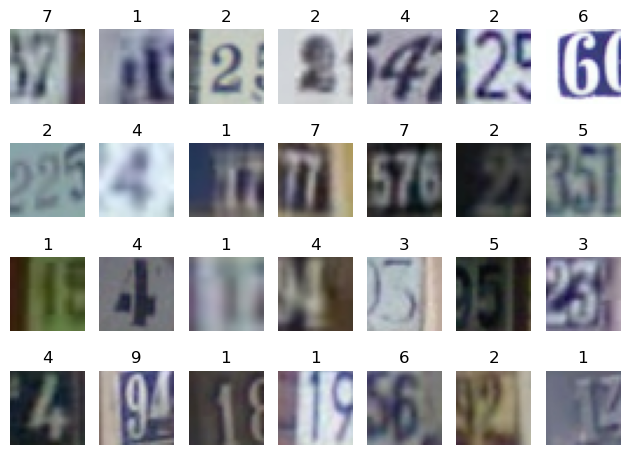

In [16]:
i=0

for x in x_train:
    plt.subplot(4,7,i+1)
    plt.title(y_train[i])
    plt.imshow(x)
    plt.axis('off')
   
    if i == 27:
        break
    i+=1
plt.tight_layout()
plt.show()

In [17]:
values , count= np.unique(y_train,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 11015
2 --> 8452
3 --> 6807
4 --> 6018
5 --> 5505
6 --> 4574
7 --> 4472
8 --> 4031
9 --> 3742
10 --> 3989


In [18]:
values , count= np.unique(y_val,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 2846
2 --> 2133
3 --> 1690
4 --> 1440
5 --> 1377
6 --> 1153
7 --> 1123
8 --> 1014
9 --> 917
10 --> 959


In [19]:
values , count= np.unique(y_test,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

1 --> 13861
2 --> 10585
3 --> 8497
4 --> 7458
5 --> 6882
6 --> 5727
7 --> 5595
8 --> 5045
9 --> 4659
10 --> 4948


In [68]:
# 10 no es un digito (son 2), hay que sustituirlo por 0
y_train=np.where(y_train==10, 0, y_train)
y_val=np.where(y_val==10, 0, y_val)
y_test=np.where(y_test==10, 0, y_test)

In [21]:
values , count= np.unique(y_train,return_counts=True)
for y, cant in zip (values,count):
    print(y,'-->',cant)

0 --> 3989
1 --> 11015
2 --> 8452
3 --> 6807
4 --> 6018
5 --> 5505
6 --> 4574
7 --> 4472
8 --> 4031
9 --> 3742


In [22]:
print(x_train[0].shape)

(32, 32, 3)


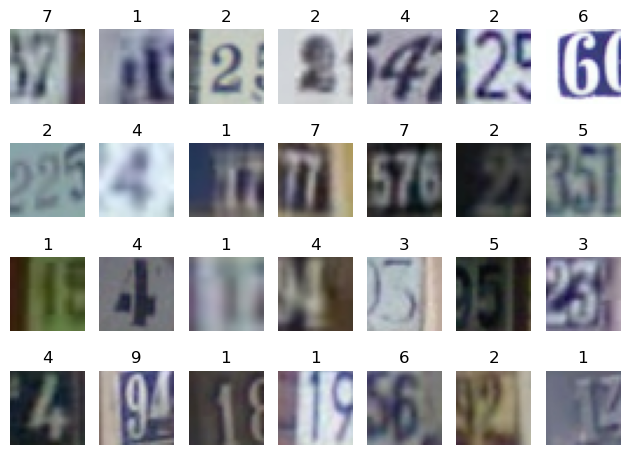

In [23]:
i=0

for x in x_train:
    plt.subplot(4,7,i+1)
    plt.title(y_train[i])
    plt.imshow(x)
    plt.axis('off')
   
    if i == 27:
        break
    i+=1
plt.tight_layout()
plt.show()

In [69]:
learning_rates=[1e-4,7e-4,1e-3,5e-3]
models=[]
histories=[]

tf.keras.backend.clear_session()

tf.random.set_seed(17)
i=0
for lr in learning_rates:
    
    model = Sequential(
        [
            Input(shape=(32, 32,3)),
            Flatten(),
            Dense(256, activation="relu"),
            Dense(64, activation="relu"),
            Dense(64, activation="relu"),
            Dense(10, activation="softmax"),
        ]
)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    

    i+=1
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
    
    

    models.append(model)


In [70]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [71]:
for model in models:
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    histories.append(model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),callbacks=early_stopping_cb))

Learning rate: 1e-04
Epoch 1/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2112 - loss: 2.1885 - val_accuracy: 0.3917 - val_loss: 1.7812
Epoch 2/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4402 - loss: 1.6597 - val_accuracy: 0.5133 - val_loss: 1.4803
Epoch 3/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5492 - loss: 1.3983 - val_accuracy: 0.5559 - val_loss: 1.3696
Epoch 4/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6051 - loss: 1.2629 - val_accuracy: 0.6101 - val_loss: 1.2259
Epoch 5/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6395 - loss: 1.1681 - val_accuracy: 0.6398 - val_loss: 1.1485
Epoch 6/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6644 - loss: 1.1026 - val_accuracy: 0.6657 - val_loss: 1.0830
Epoch 7/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6807 - loss: 1.0516 - val_accuracy: 0.6764 - val_loss: 1.0518
Epoch 8/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accur


Modelo 1:
Learning rate: 1e-04
Pérdida de Entrenamiento: 0.6789844632148743
Precisión de Etrenamiento: 0.7953928709030151
Pérdida de Validación: 0.7695131301879883
Precisión de Validación: 0.7694512605667114


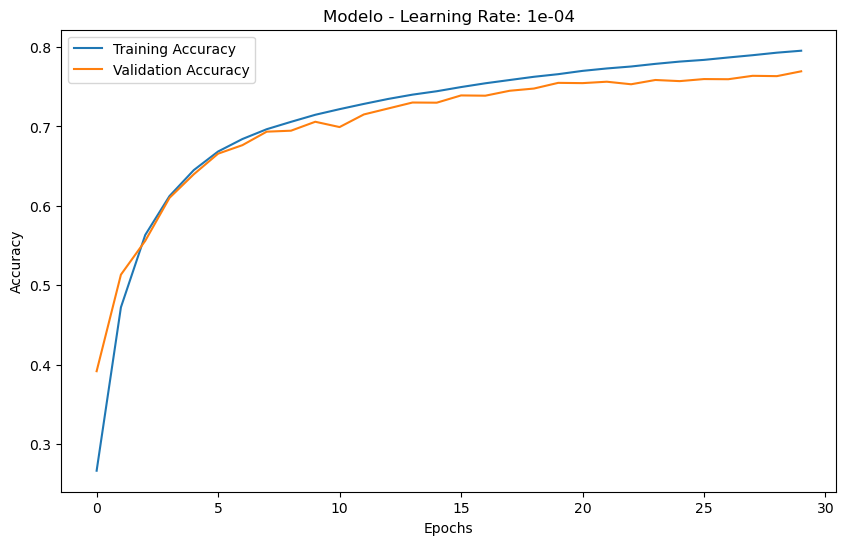


Modelo 2:
Learning rate: 0.0007
Pérdida de Entrenamiento: 0.9949551820755005
Precisión de Etrenamiento: 0.6906577944755554
Pérdida de Validación: 1.0564316511154175
Precisión de Validación: 0.6685776710510254


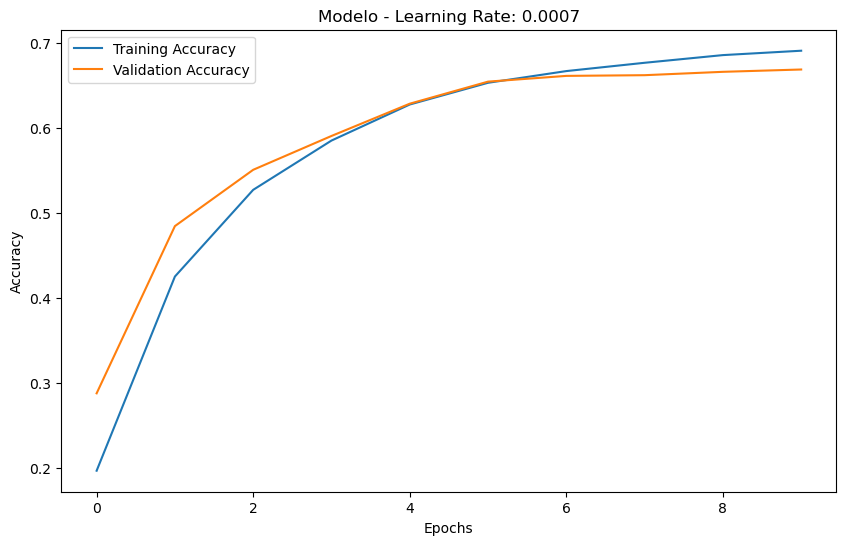


Modelo 3:
Learning rate: 0.001
Pérdida de Entrenamiento: 0.9983002543449402
Precisión de Etrenamiento: 0.6866649389266968
Pérdida de Validación: 1.0324580669403076
Precisión de Validación: 0.674924910068512


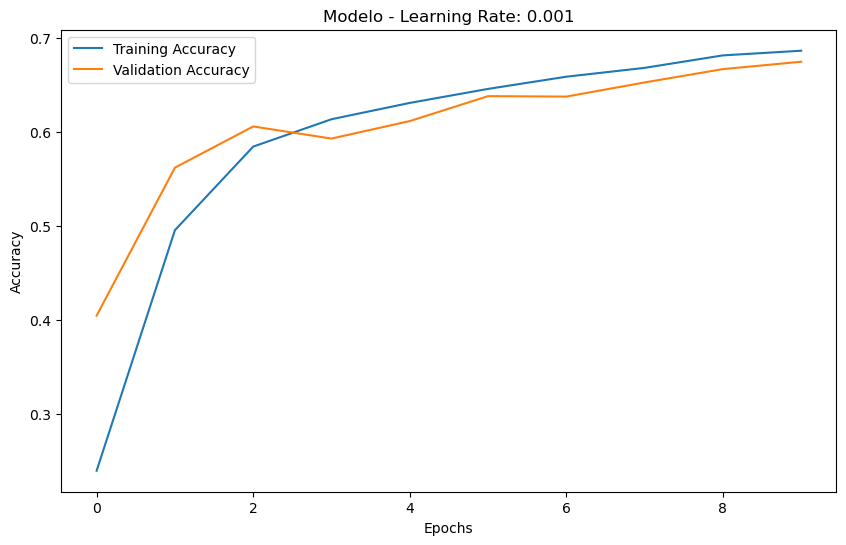


Modelo 4:
Learning rate: 0.005
Pérdida de Entrenamiento: 2.2382442951202393
Precisión de Etrenamiento: 0.18795324862003326
Pérdida de Validación: 2.2323126792907715
Precisión de Validación: 0.19423969089984894


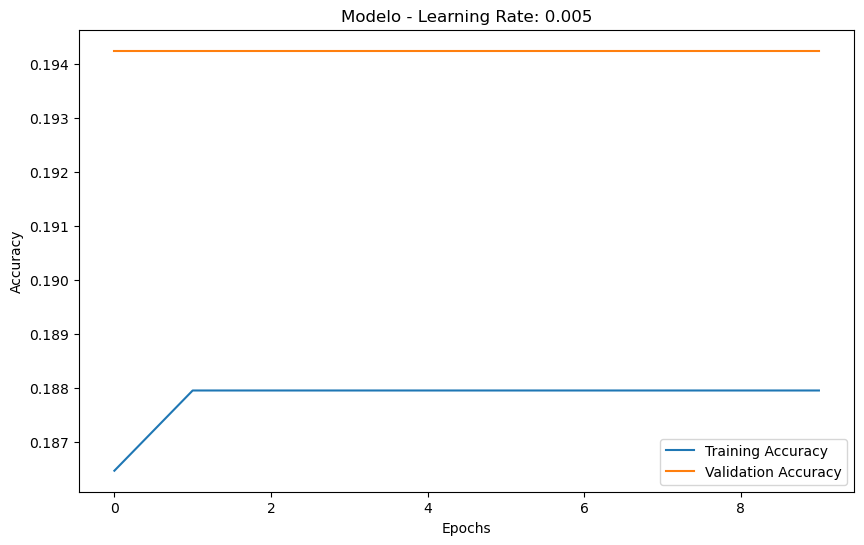

In [73]:
mejor_precision = 0
mejor_modelo = None
mejor_lr = None
mejor_resultado = None


for idx, history in enumerate(histories, start=1):
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    val_accuracy= history.history['val_accuracy'][-1]

    print(f"\nModelo {idx}:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida de Entrenamiento:", train_loss)
    print("Precisión de Etrenamiento:", train_accuracy)
    print("Pérdida de Validación:", val_loss)
    print("Precisión de Validación:", val_accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Modelo - Learning Rate: {str(models[idx-1].optimizer.learning_rate.numpy())}')
    plt.legend()
    plt.show()



    
    
    if train_accuracy > mejor_precision:
        mejor_precision = train_accuracy
        mejor_lr = models[idx-1].optimizer.learning_rate.numpy()
        mejor_resultado = (train_loss, train_accuracy)
        mejor_historial = history  # Guardar historial del mejor modelo
        mejor_modelo = models[idx-1]




Mejor Modelo:
Learning rate: 1e-04


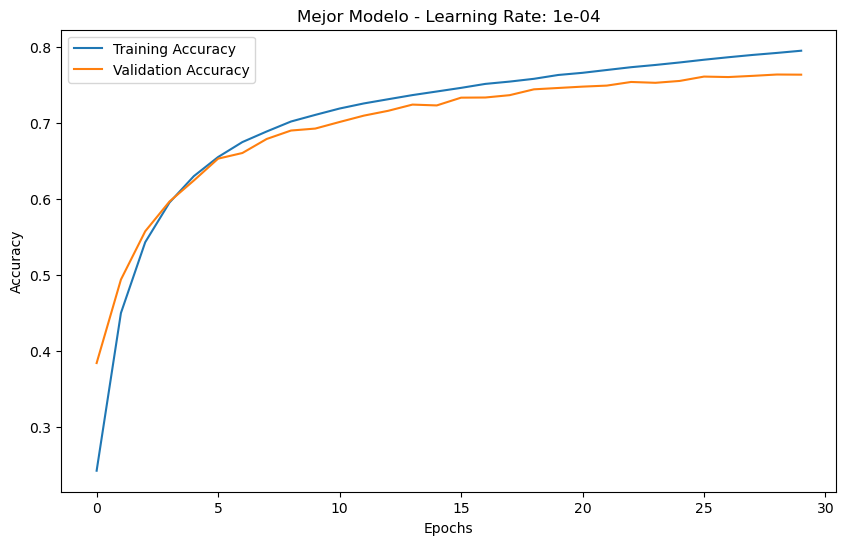

In [35]:
if mejor_historial:
    print("\nMejor Modelo:")
    print("Learning rate:", mejor_lr)
   
    # Graficar el mejor modelo
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_historial.history['accuracy'], label='Training Accuracy')
    plt.plot(mejor_historial.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Mejor Modelo - Learning Rate: {str(mejor_lr)}')
    plt.legend()
    plt.show()
else:
    print("No se encontró ningún modelo con mejor precisión.")

In [37]:
test_loss, test_accuracy = mejor_modelo.evaluate(x_test, y_test)
print("Pérdida:", test_loss, "Precisión:", test_accuracy)

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7823 - loss: 0.7201
Pérdida: 0.7222180962562561 Precisión: 0.7809628844261169


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


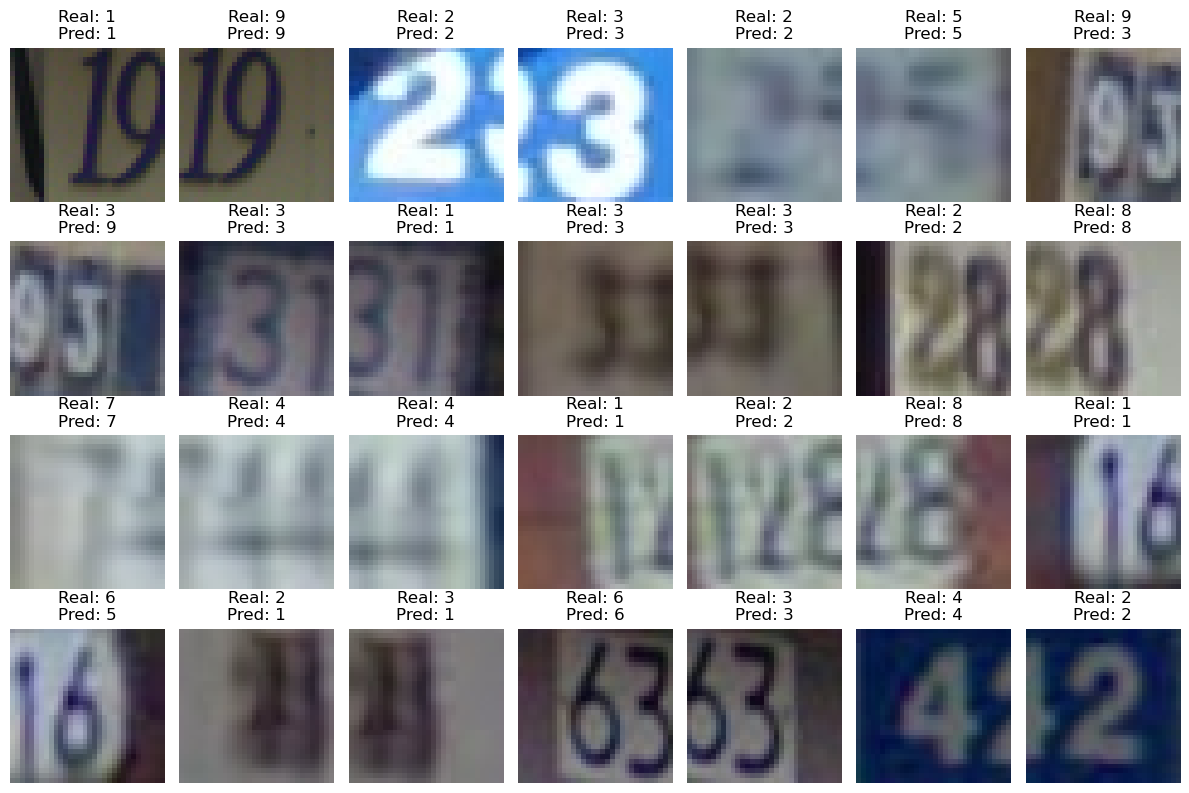

In [38]:
num_imagenes = 28

# Realizar predicciones con el mejor modelo
predicciones = mejor_modelo.predict(x_test[:num_imagenes])
etiquetas_predichas = np.argmax(predicciones, axis=1)  # Convertir a etiquetas categóricas

# Mostrar imágenes junto con la etiqueta real y la predicción
plt.figure(figsize=(12, 8))
for i in range(num_imagenes):
    plt.subplot(4, 7, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')  # Ajusta la forma según tu dataset
    plt.title(f"Real: {y_test[i]}\nPred: {etiquetas_predichas[i]}")
    plt.axis('off')
    

plt.tight_layout()
plt.show()

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [74]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

In [51]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [42]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [43]:
data["X7"].value_counts()

X7
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64

In [44]:
corr_matrix = data.corr(numeric_only=True).abs()
corr_matrix.style.background_gradient()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,0.991901,0.203782,0.868823,0.827747,0.000000,0.000000,0.000000,0.622272,0.634339
X2,0.991901,1.000000,0.195502,0.880720,0.858148,0.000000,0.000000,0.000000,0.658120,0.672999
X3,0.203782,0.195502,1.000000,0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,0.868823,0.880720,0.292316,1.000000,0.972512,0.000000,0.000000,0.000000,0.861828,0.862547
X5,0.827747,0.858148,0.280976,0.972512,1.000000,0.000000,0.000000,0.000000,0.889430,0.895785
X6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002587,0.014290
X7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.212964,0.269842,0.207505
X8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,0.658120,0.455671,0.861828,0.889430,0.002587,0.269842,0.087368,1.000000,0.975862
Y2,0.634339,0.672999,0.427117,0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [92]:
y_full = data[['Y1','Y2']].copy()
x_full = data.drop(['Y1','Y2'],axis=1)
x_train_full, x_test, y_train_full, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=17)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=17)


In [165]:
learning_rates=[1e-4,7e-4,1e-3,5e-3]
models=[]
histories=[]

tf.keras.backend.clear_session()
tf.random.set_seed(17)
norm_layer = tf.keras.layers.Normalization(input_shape=x_train.shape[1:])

i=0
for lr in learning_rates:
    
    model = Sequential([
        Input(shape=(8,)),  # Capa de entrada correcta
        norm_layer,
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(8, activation="relu"),
        Dense(2)  # Cambiado a 2 neuronas para clasificación binaria
    ])
    
    # Definiendo el optimizador con la tasa de aprendizaje actual
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    
    model.compile(loss="mean_absolute_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])
    
    

    models.append(model)


/home/iabd/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

In [167]:
for model in models:
    print("Learning rate:", model.optimizer.learning_rate.numpy())
    histories.append(model.fit(x_train, y_train, epochs=75, validation_data=(x_val, y_val),callbacks=early_stopping_cb))

Learning rate: 1e-04
Epoch 1/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 10.5115 - mean_absolute_error: 10.5115 - val_loss: 6.7106 - val_mean_absolute_error: 6.7106
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4584 - mean_absolute_error: 6.4584 - val_loss: 5.2600 - val_mean_absolute_error: 5.2600
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3057 - mean_absolute_error: 5.3057 - val_loss: 4.4096 - val_mean_absolute_error: 4.4096
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6111 - mean_absolute_error: 4.6111 - val_loss: 4.0337 - val_mean_absolute_error: 4.0337
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3058 - mean_absolute_error: 4.3058 - val_loss: 4.0175 - val_mean_absolute_error: 4.0175
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2747 - mean_absolute_error: 4.2747 - val_loss: 3.8968 - val_mean_absolute_error: 3.8968
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1721 - mean_absolute_error: 


Modelo 1:
Learning rate: 1e-04
Pérdida de Entrenamiento: 2.9055092334747314
Error de Etrenamiento: 2.9055092334747314
Pérdida de Validación: 2.8155274391174316
Error de Validación: 2.8155274391174316


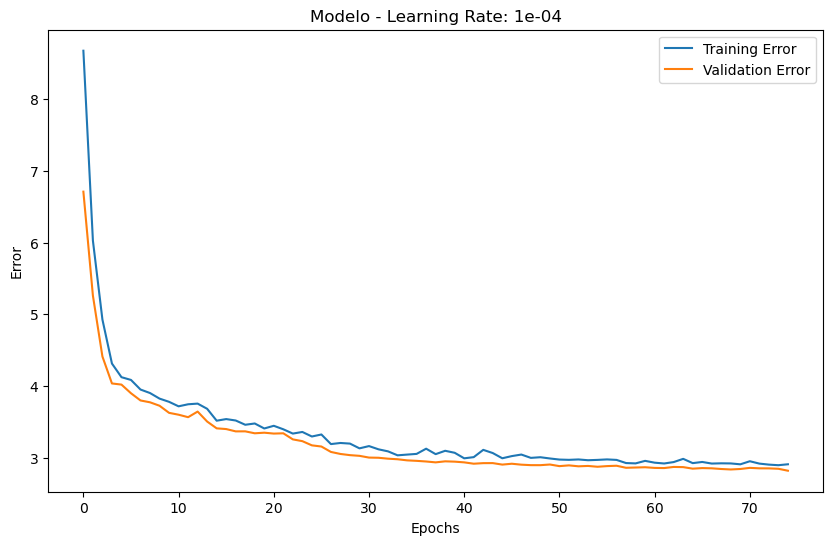


Modelo 2:
Learning rate: 0.0007
Pérdida de Entrenamiento: 3.321195602416992
Error de Etrenamiento: 3.321195602416992
Pérdida de Validación: 3.3518571853637695
Error de Validación: 3.3518571853637695


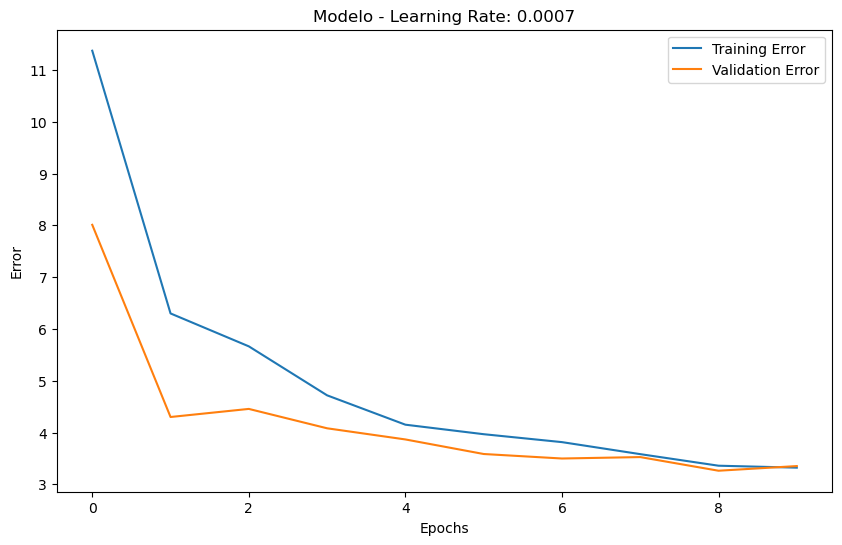


Modelo 3:
Learning rate: 0.001
Pérdida de Entrenamiento: 4.117171287536621
Error de Etrenamiento: 4.117171287536621
Pérdida de Validación: 3.5230724811553955
Error de Validación: 3.5230724811553955


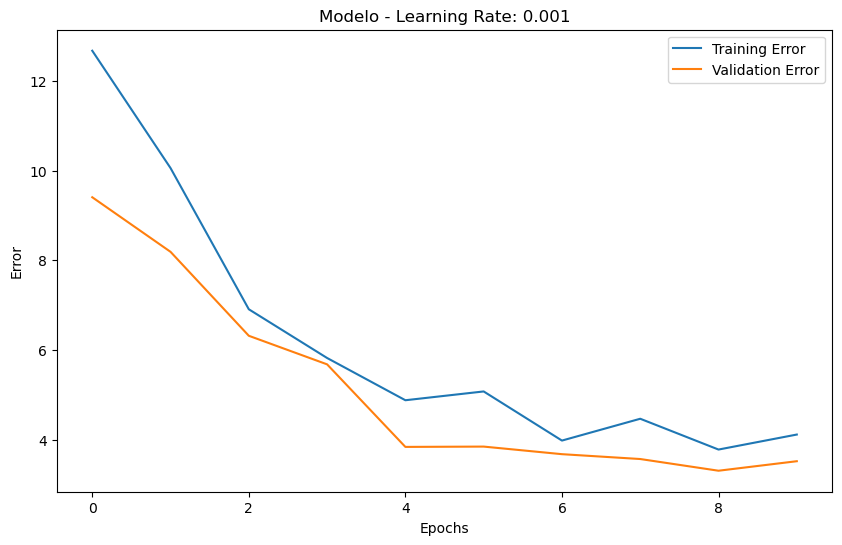


Modelo 4:
Learning rate: 0.005
Pérdida de Entrenamiento: 3.207117795944214
Error de Etrenamiento: 3.207117795944214
Pérdida de Validación: 3.1690311431884766
Error de Validación: 3.1690311431884766


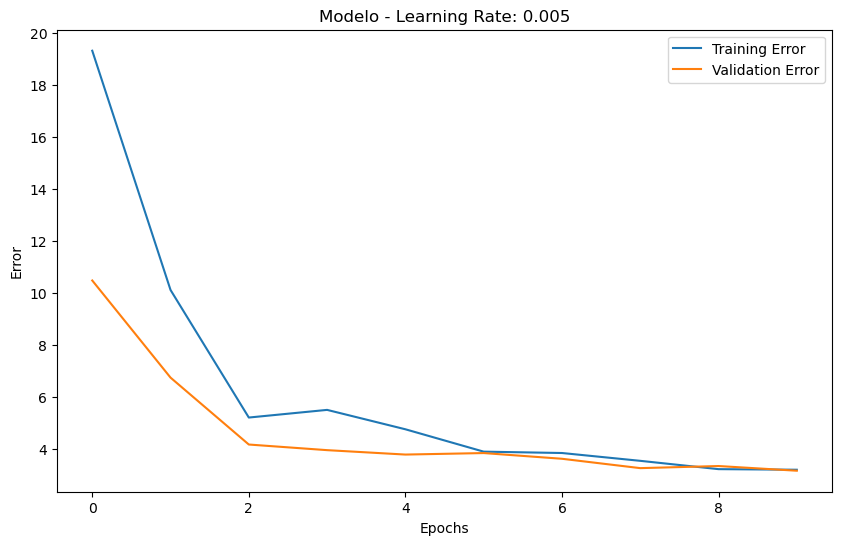

In [168]:
mejor_error = 99999
mejor_modelo = None
mejor_lr = None
mejor_resultado = None


for idx, history in enumerate(histories, start=1):
    train_loss = history.history['loss'][-1]
    train_error = history.history['mean_absolute_error'][-1]
    val_loss = history.history['val_loss'][-1]
    val_error= history.history['val_mean_absolute_error'][-1]

    print(f"\nModelo {idx}:")
    print("Learning rate:", models[idx-1].optimizer.learning_rate.numpy())
    print("Pérdida de Entrenamiento:", train_loss)
    print("Error de Etrenamiento:", train_error)
    print("Pérdida de Validación:", val_loss)
    print("Error de Validación:", val_error)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mean_absolute_error'], label='Training Error')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Modelo - Learning Rate: {str(models[idx-1].optimizer.learning_rate.numpy())}')
    plt.legend()
    plt.show()
    
    if train_error <= mejor_error:
        mejor_error = train_error
        mejor_lr = models[idx-1].optimizer.learning_rate.numpy()
        mejor_resultado = (train_loss, train_error)
        mejor_historial = history  # Guardar historial del mejor modelo
        mejor_modelo = models[idx-1]


Mejor Modelo:
Learning rate: 1e-04
Pérdida: 2.9055092334747314 Error: 2.9055092334747314


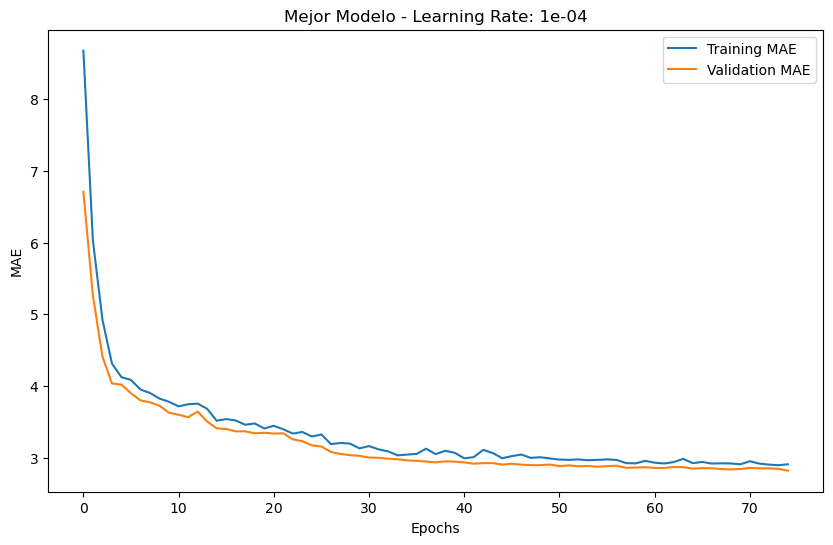

In [169]:
if mejor_historial:
    print("\nMejor Modelo:")
    print("Learning rate:", mejor_lr)
    print("Pérdida:", mejor_resultado[0], "Error:", mejor_resultado[1])
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_historial.history['mean_absolute_error'], label='Training MAE')
    plt.plot(mejor_historial.history['val_mean_absolute_error'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Mejor Modelo - Learning Rate: {str(mejor_lr)}')
    plt.legend()
    plt.show()
else:
    print("No se encontró ningún modelo con mejor precisión.")

In [170]:
num_prediccs = 25

# Realizar predicciones con el mejor modelo
predicciones = np.array(mejor_modelo.predict(x_test[:num_prediccs]))
val_real=np.array(y_test[:num_prediccs])

# val_real_normalized = (val_real - np.min(val_real)) / (np.max(val_real) - np.min(val_real))

for i in range(len(predicciones)):
    print(predicciones[i], val_real[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[12.618288 13.829617] [14.22 15.39]
[14.262322 15.620101] [12.93 15.83]
[31.244177 32.979584] [29.05 29.67]
[15.850146 17.349367] [14.66 15.64]
[14.110881 15.45517 ] [13.18 16.27]
[15.3535  16.80848] [16.69 19.76]
[35.464447 37.590828] [42.11 38.56]
[29.912628 32.024876] [26.84 30.17]
[14.206571 15.559382] [14.72 18.1 ]
[31.308687 33.040844] [33.13 32.25]
[30.380634 32.484398] [25.49 28.14]
[30.117893 32.226807] [28.64 28.95]
[13.521074 14.812822] [14.33 17.23]
[35.469223 37.136208] [36.86 37.28]
[15.85085  17.350134] [14.6  15.14]
[35.366264 37.493942] [40.   36.26]
[24.93224  27.028208] [32.13 32.28]
[14.130584 15.476627] [15.23 18.14]
[15.8111725 17.306921 ] [15.12 15.95]
[35.464115 37.128902] [33.28 34.11]
[15.271771 16.719471] [17.02 20.48]
[24.94599  27.041122] [29.4  32.93]
[12.625272 13.837222] [14.1  16.57]
[15.910971 17.415611] [12.85 14.37]
[35.44299  37.112007] [32.21 33.67]
